<a href="https://ibb.co/dJq9RJG"><img src="https://i.ibb.co/6JxhkJg/lab4-protocol.png" alt="lab4-protocol" border="0"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

import pandas as pd
import seaborn as sns
from scipy.signal import cont2discrete
from seaborn import pairplot
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( classification_report, confusion_matrix, f1_score, precision_recall_curve,
    precision_score, recall_score, roc_auc_score, roc_curve, plot_roc_curve, accuracy_score)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OneHotEncoder

# 1. Взяти дані з роботи №2 згідно з варінтом. Представити дані графічно.

In [2]:
#creating dataset1
rng = np.random.RandomState(1)
X1 = 10 * rng.rand(50)
Y1 = np.sin(X1) + 0.1 * rng.randn(50)
#creating dataset2
X2, Y2 = load_diabetes(return_X_y=True)

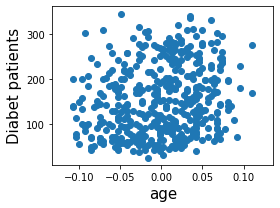

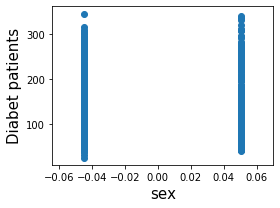

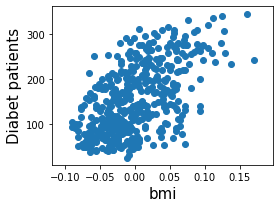

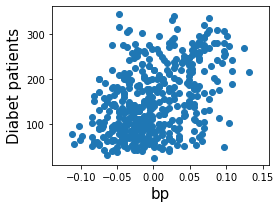

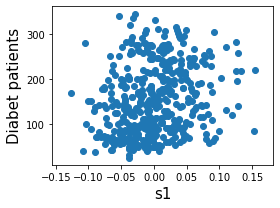

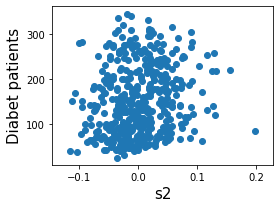

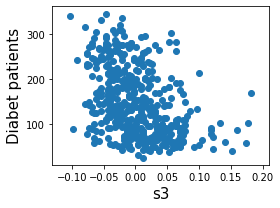

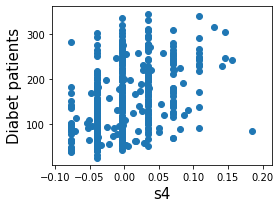

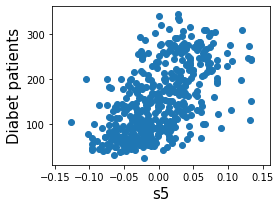

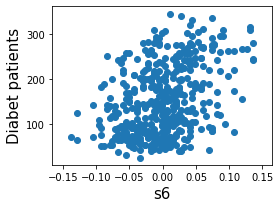

In [3]:
#LOAD_DIABETES DATASET VISUALIZATION
for index, feature_name in enumerate(load_diabetes().feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(load_diabetes().data[:, index], load_diabetes().target)
    plt.ylabel('Diabet patients', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

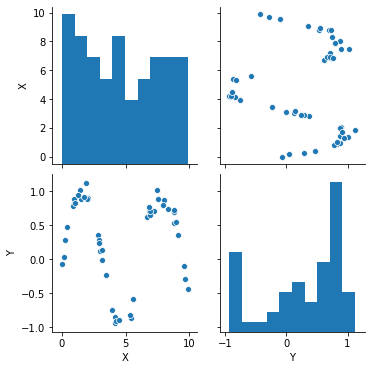

In [4]:
# DATASET1 VISUALIZATION
pairplot(pd.DataFrame({'X': X1.reshape(50,), 'Y':Y1}))
plt.show()

In [5]:
#data converting from continuous to discrette view(logistic regr is classification, not regr)
def continuous_to_discrette(y, number_of_classes):
    return pd.cut(y, bins=number_of_classes, 
                  labels=np.arange(number_of_classes), right=False).astype('int')

In [6]:
num_of_classes1 = 3
num_of_classes2 = 4
Y1_discrette = continuous_to_discrette(Y1, num_of_classes1)
Y2_discrette = continuous_to_discrette(Y2, num_of_classes2)

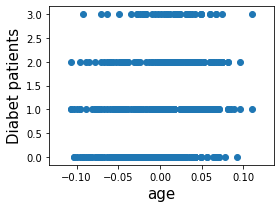

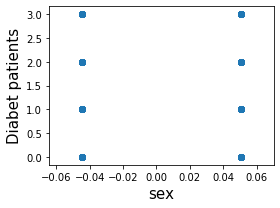

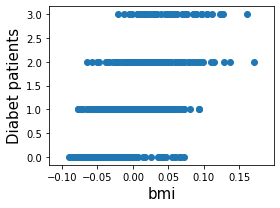

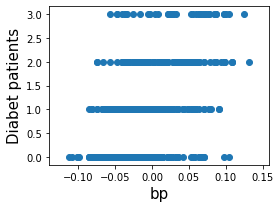

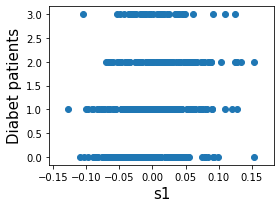

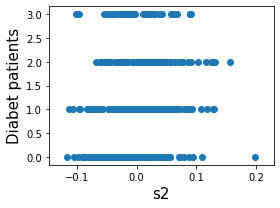

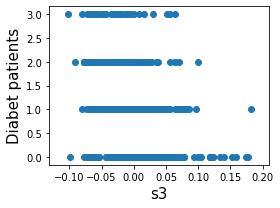

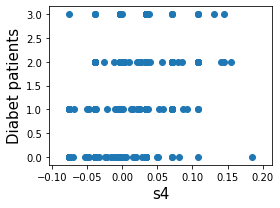

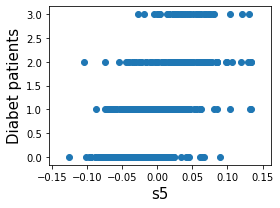

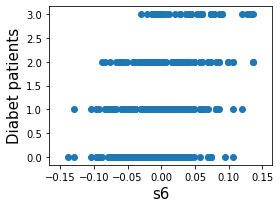

In [7]:
#LOAD_DIABETES DATASET DISCRETTE VISUALIZATION
for index, feature_name in enumerate(load_diabetes().feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(load_diabetes().data[:, index], Y2_discrette)
    plt.ylabel('Diabet patients', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

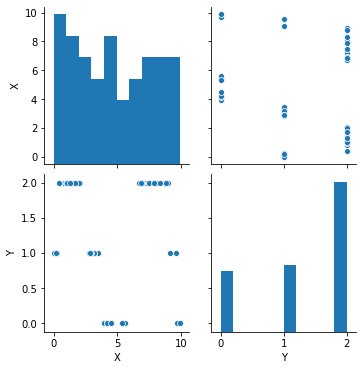

In [8]:
# DATASET1 DISCRETTE VISUALIZATION
pairplot(pd.DataFrame({'X': X1.reshape(50,), 'Y':Y1_discrette}))
plt.show()

# 2. Побудувати моделі нейронних мереж, використовуючи класи MLPClassifier aбо MLPRegressor, для классифікації або регресії згідно з варіантом

У другій роботі я мав варіант з логістичною регресію, що є алгоритмом класифікації, тому буду використовувати MLPClassifier

# Дослідити вплив різних методів визначення learning_rate на результат класифікації (для solver = 'sgd')

# Розглянути різні значення max_iter,  дослідити іх на вплив на результати класифікації

# Вивести значення функції витрат на декількох перших і декількох останніх ітераціях. Вивести значення середньої точності класифікації/регресії на навчальній і тестовій множинах, використовуючи score

Ця модель нейронних мереж, як виявилось, дуже сильно залежить від деяких параметрів, тому пропоную сжаті теоретичні відомості про параметри узяті з офіційної документації:

### Парамиетр Solver, який дуже вплине на результат:

The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

### Параметр learning_rate, вплив якого на результат я безпосередньо досліджую:

learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
Learning rate schedule for weight updates.

‘constant’ is a constant learning rate given by ‘learning_rate_init’.

‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.





In [9]:
scaler1, scaler2 = StandardScaler(), StandardScaler()
X1 = scaler1.fit_transform(X1.reshape(-1,1))
X2 = scaler2.fit_transform(X2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1_discrette,
                                        test_size=0.2, random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2_discrette,
                                        test_size=0.2, random_state=2)

In [10]:
def get_mlps(X_train, y_train, X_test, y_test, params, labels, max_iter, verbose=False):
    mlps = []
  
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(max_iter=max_iter, verbose=verbose, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                module="sklearn")
            mlp.fit(X_train, y_train)

        mlps.append(mlp)
        print(f"Training set score: {mlp.score(X_train, y_train)}")
        print(f"Test set score: {mlp.score(X_test, y_test)}")
  
    return mlps

In [11]:
def plot_loss_curve(name, mlps, labels, plot_args):
    plt.figure(figsize=(10,6))
    plt.title(name)

    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

    plt.legend(labels)
    plt.show()

In [12]:
#sdg solver
default_params = {'solver': 'sgd', 'early_stopping': False} 

params = [{'learning_rate': 'constant', **default_params},
          {'learning_rate': 'invscaling', **default_params},
          {'learning_rate': 'adaptive', **default_params}]

#default solver

default_params2 = {'early_stopping': False}

params2 = [{'learning_rate': 'constant', **default_params2},
          {'learning_rate': 'invscaling', **default_params2},
          {'learning_rate': 'adaptive', **default_params2}]

labels = ["learning_rate = 'constant'", "learning_rate = 'invscaling'", 
          "learning_rate = 'adaptive'"]

plot_args = [{'c': 'red', 'linestyle': '-', 'linewidth': 3.0},
             {'c': 'green', 'linestyle': '-', 'linewidth': 3.0},
             {'c': 'blue', 'linestyle': '-', 'linewidth': 3.0}]

max_iters = [x for x in range(50, 250, 50)] + [x for x in range(500, 2500, 500)]


DATASET1 WITH DEFAULT 'ADAM' SOLVER AT 2000ITERATIONS
training: learning_rate = 'constant'
Training set score: 0.95
Test set score: 0.9
training: learning_rate = 'invscaling'
Training set score: 0.95
Test set score: 0.9
training: learning_rate = 'adaptive'
Training set score: 0.95
Test set score: 0.9


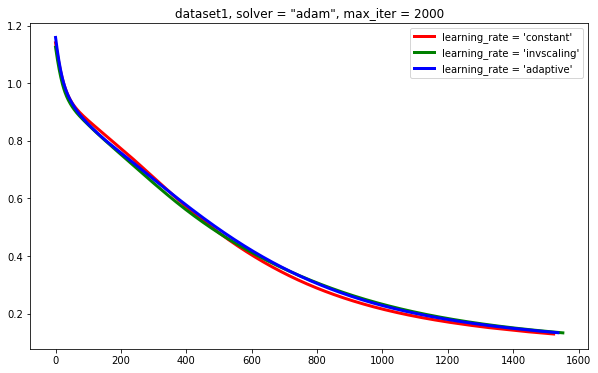

DATASET1 WITH 'SGD' SOLVER AT DIFFERENT LEARNING RATE AND NUMBER OF ITERATIONS
DATASET1, MAX_ITERS =  50
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.3
Test set score: 0.2
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


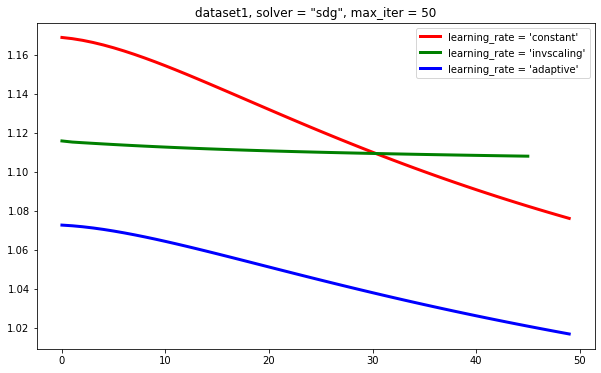

DATASET1, MAX_ITERS =  100
training: learning_rate = 'constant'
Training set score: 0.575
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.425
Test set score: 0.3
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


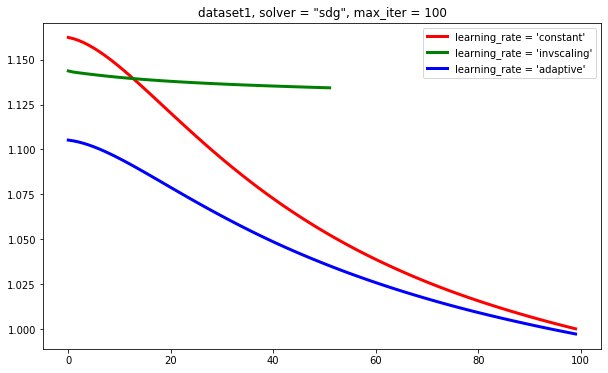

DATASET1, MAX_ITERS =  150
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.225
Test set score: 0.2
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


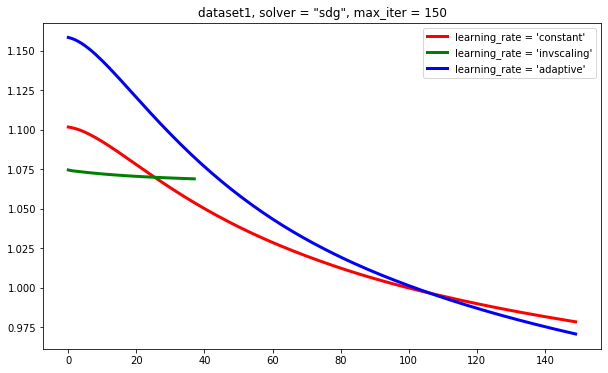

DATASET1, MAX_ITERS =  200
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


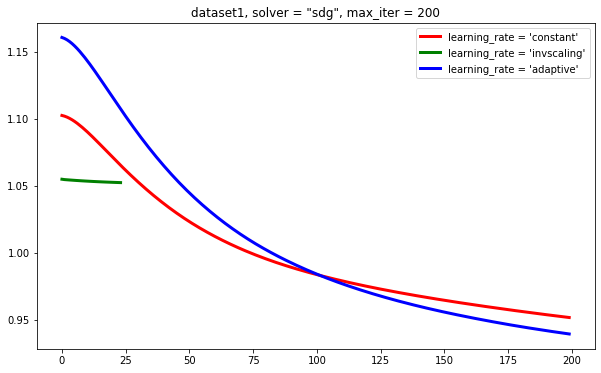

DATASET1, MAX_ITERS =  500
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.25
Test set score: 0.2
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


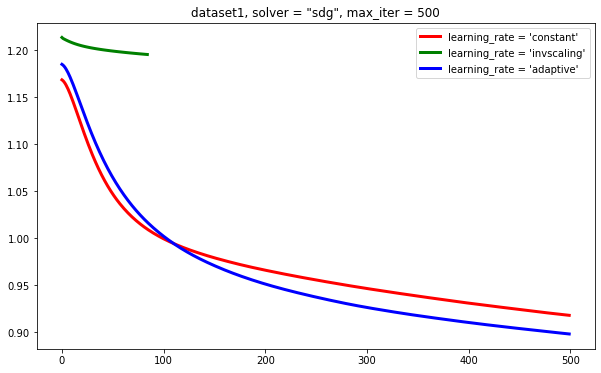

DATASET1, MAX_ITERS =  1000
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.225
Test set score: 0.2
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


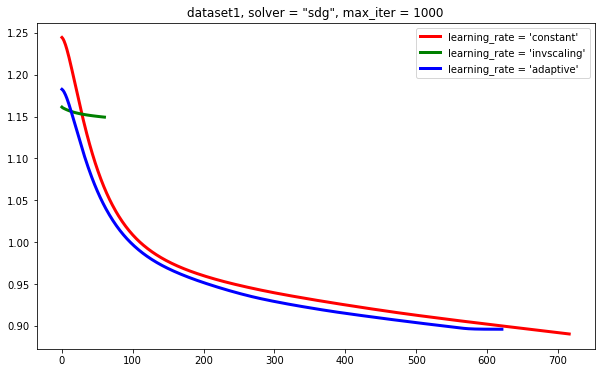

DATASET1, MAX_ITERS =  1500
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.3
Test set score: 0.2
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


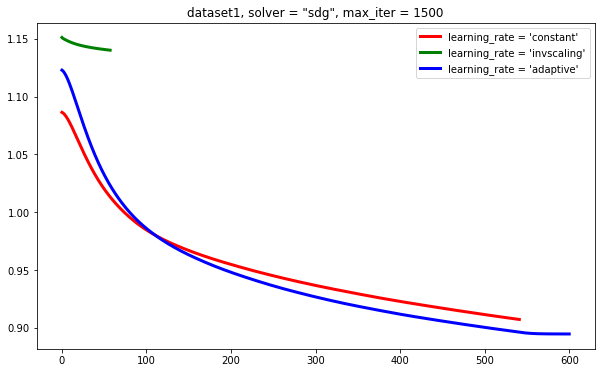

DATASET1, MAX_ITERS =  2000
training: learning_rate = 'constant'
Training set score: 0.525
Test set score: 0.6
training: learning_rate = 'invscaling'
Training set score: 0.225
Test set score: 0.2
training: learning_rate = 'adaptive'
Training set score: 0.525
Test set score: 0.6


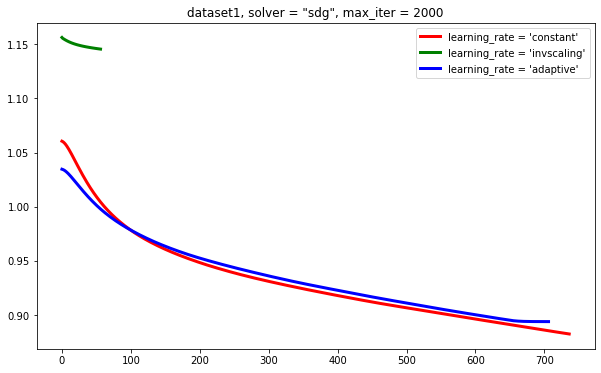

In [13]:
#Dataset1 (result with default 'adam solver' at 2000iters)
print("DATASET1 WITH DEFAULT 'ADAM' SOLVER AT 2000ITERATIONS")
mlps = get_mlps(X1_train, y1_train, X1_test, y1_test, params2, labels, 2000)
plot_loss_curve(f'dataset1, solver = "adam", max_iter = 2000', mlps, labels, plot_args)


print("DATASET1 WITH 'SGD' SOLVER AT DIFFERENT LEARNING RATE AND NUMBER OF ITERATIONS")
#dataset1 (results with different leartning rate and different max_iters at "sdg solver")
for max_iter in max_iters:
    print("DATASET1, MAX_ITERS = ", max_iter)
    mlps = get_mlps(X1_train, y1_train, X1_test, y1_test, params, labels, max_iter)
    plot_loss_curve(f'dataset1, solver = "sdg", max_iter = { max_iter }', mlps, labels, plot_args)

DATASET2 WITH DEFAULT 'ADAM' SOLVER AT 2000ITERATIONS
training: learning_rate = 'constant'
Training set score: 0.9971671388101983
Test set score: 0.449438202247191
training: learning_rate = 'invscaling'
Training set score: 0.9971671388101983
Test set score: 0.4044943820224719
training: learning_rate = 'adaptive'
Training set score: 0.9971671388101983
Test set score: 0.4157303370786517


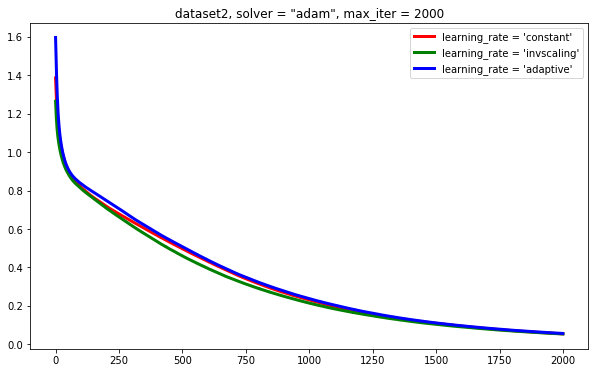

DATASET2 WITH 'SGD' SOLVER AT DIFFERENT LEARNING RATE AND NUMBER OF ITERATIONS
DATASET2, MAX_ITERS =  50
training: learning_rate = 'constant'
Training set score: 0.48725212464589235
Test set score: 0.4943820224719101
training: learning_rate = 'invscaling'
Training set score: 0.20396600566572237
Test set score: 0.29213483146067415
training: learning_rate = 'adaptive'
Training set score: 0.47875354107648727
Test set score: 0.4943820224719101


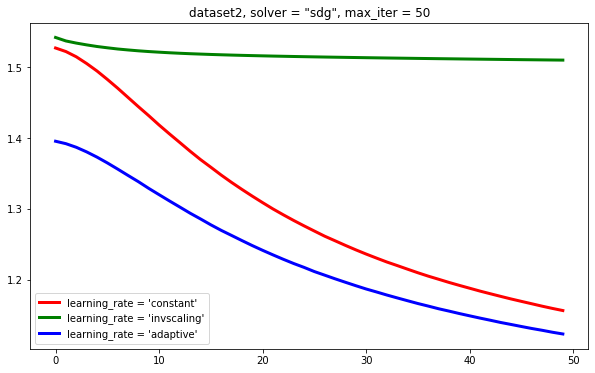

DATASET2, MAX_ITERS =  100
training: learning_rate = 'constant'
Training set score: 0.49291784702549574
Test set score: 0.42696629213483145
training: learning_rate = 'invscaling'
Training set score: 0.21529745042492918
Test set score: 0.29213483146067415
training: learning_rate = 'adaptive'
Training set score: 0.5155807365439093
Test set score: 0.5056179775280899


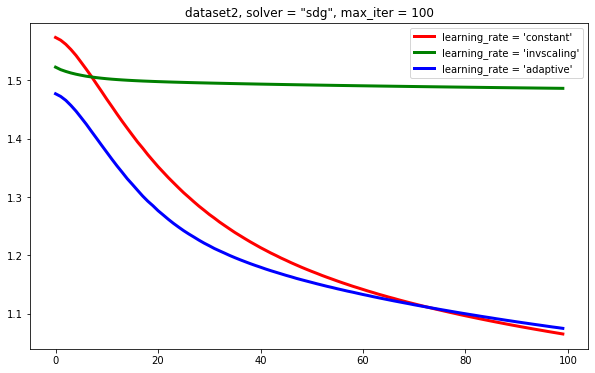

DATASET2, MAX_ITERS =  150
training: learning_rate = 'constant'
Training set score: 0.5297450424929179
Test set score: 0.47191011235955055
training: learning_rate = 'invscaling'
Training set score: 0.38243626062322944
Test set score: 0.3595505617977528
training: learning_rate = 'adaptive'
Training set score: 0.5410764872521246
Test set score: 0.449438202247191


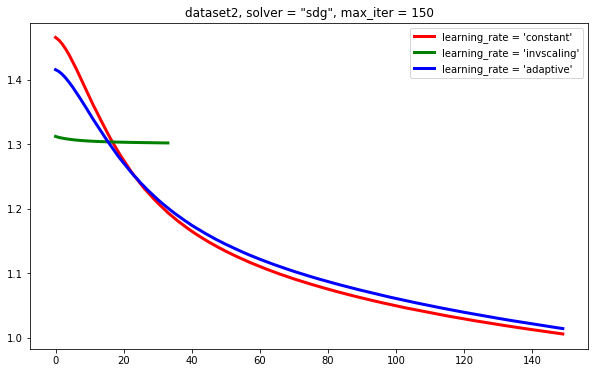

DATASET2, MAX_ITERS =  200
training: learning_rate = 'constant'
Training set score: 0.5779036827195467
Test set score: 0.48314606741573035
training: learning_rate = 'invscaling'
Training set score: 0.3371104815864023
Test set score: 0.3258426966292135
training: learning_rate = 'adaptive'
Training set score: 0.5807365439093485
Test set score: 0.4943820224719101


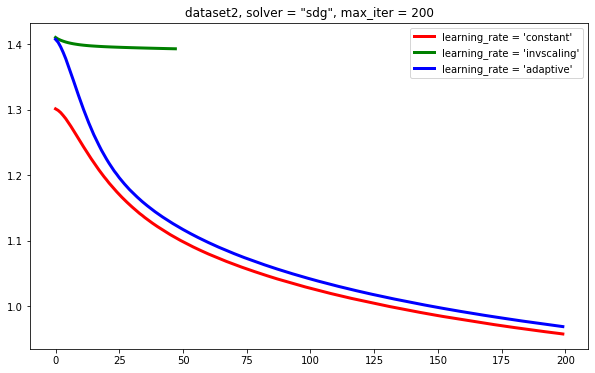

DATASET2, MAX_ITERS =  500
training: learning_rate = 'constant'
Training set score: 0.6147308781869688
Test set score: 0.4943820224719101
training: learning_rate = 'invscaling'
Training set score: 0.29178470254957506
Test set score: 0.25842696629213485
training: learning_rate = 'adaptive'
Training set score: 0.5949008498583569
Test set score: 0.5280898876404494


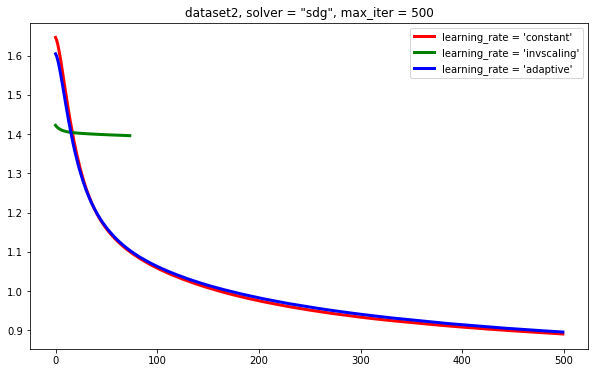

DATASET2, MAX_ITERS =  1000
training: learning_rate = 'constant'
Training set score: 0.6288951841359773
Test set score: 0.4606741573033708
training: learning_rate = 'invscaling'
Training set score: 0.1813031161473088
Test set score: 0.2247191011235955
training: learning_rate = 'adaptive'
Training set score: 0.6175637393767706
Test set score: 0.5168539325842697


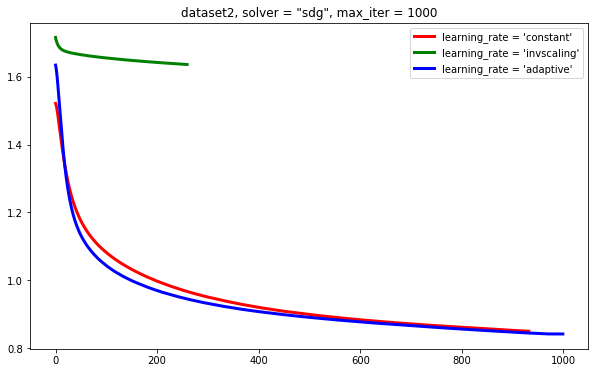

DATASET2, MAX_ITERS =  1500
training: learning_rate = 'constant'
Training set score: 0.6118980169971672
Test set score: 0.5056179775280899
training: learning_rate = 'invscaling'
Training set score: 0.24079320113314448
Test set score: 0.21348314606741572
training: learning_rate = 'adaptive'
Training set score: 0.6118980169971672
Test set score: 0.5393258426966292


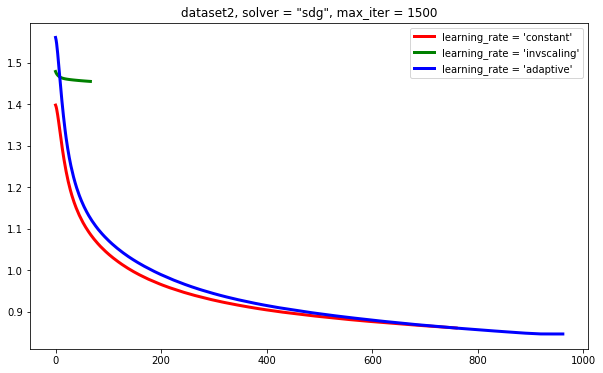

DATASET2, MAX_ITERS =  2000
training: learning_rate = 'constant'
Training set score: 0.6203966005665722
Test set score: 0.5393258426966292
training: learning_rate = 'invscaling'
Training set score: 0.24929178470254956
Test set score: 0.19101123595505617
training: learning_rate = 'adaptive'
Training set score: 0.6175637393767706
Test set score: 0.5168539325842697


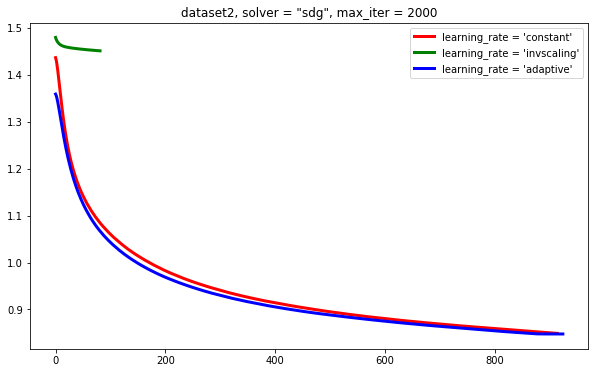

In [14]:
#Dataset2 (result with default 'adam solver' at 2000iters)
print("DATASET2 WITH DEFAULT 'ADAM' SOLVER AT 2000ITERATIONS")
mlps = get_mlps(X2_train, y2_train, X2_test, y2_test, params2, labels, 2000)
plot_loss_curve(f'dataset2, solver = "adam", max_iter = 2000', mlps, labels, plot_args)


print("DATASET2 WITH 'SGD' SOLVER AT DIFFERENT LEARNING RATE AND NUMBER OF ITERATIONS")
#dataset2 (results with different leartning rate and different max_iters at "sdg solver")
for max_iter in max_iters:
    print("DATASET2, MAX_ITERS = ", max_iter)
    mlps = get_mlps(X2_train, y2_train, X2_test, y2_test, params, labels, max_iter)
    plot_loss_curve(f'dataset2, solver = "sdg", max_iter = { max_iter }', mlps, labels, plot_args)

# Висновок:

Про solver:

Згідно в моїм варінтом я повинен дослідити результати класифікації при різних значеннях параметру learning_rate при параметрі solver='sdg', але в процесі дослідження виявилось, що взагалі використовувати solver='sdg' замість дефолтного 'adam' не є доречних на заданих датасетах, так как результат класифікації відразу чутно погіршується, що добре відображає звижайний score, особливо на першому датасеті, де ми мали score=0.9 навіть на тестовій множині, а змінивши значення параметру solver на 'sdg', я більше не зміг отримати score навіть більше за 0.6

Про learning_rate на solver='sdg' при різній кількості max_iters:

На першому датасеті просліджується досить великий вплив даного параметру на результат класифікації. При встановленому значенні параметра 'invscaling' ми спостерігаємо зниження score до 0.3-0.4 практично на будь-якій кількості ітерацій. На другому датасеті також прослідковується найбільш поганий результат саме при цьому значенні параметру learning_rate не сильно залежучи від кількості ітерацій. 
Значення 'constant' і 'adaptive' параметру learning_rate дають практично однаковий результат класифікації на обох датасетах незалежно від кількості  ітерацій.

Говорячи наскільки впливає встановлена заздалегіть кількіть ітерацій, можна сказати, що на другому датасеті ми бачимо покращення точності класифікації при збільшеннї кількості ітерацій до 500, але вона знижується при збільшенні кількості ітерацій за 1500, тобто відбувається перенавчання. На першому ж датасеті точність росте при збільшинні кількості ітерацій до 100, алек потім вплив цього параметра прагне до нулю.



#### На основі проведеного дослідження різних параметрів моделей, пропоную обрати моделі з наступними параметрами за фінальні на кожному з датасетів, як моделі, що дають найкращий результат:

#### Dataset1:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

#### Dataset2:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

In [15]:
#dataset1 best model score & loss_curve
params1 = {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto','beta_1': 0.9,
           'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 
           'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 
           'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 
           'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 
           'validation_fraction': 0.1, 'warm_start': False}
mlp1 = MLPClassifier(verbose=False, **params1)
mlp1.fit(X1_train, y1_train)
print(mlp1.score(X1_train, y1_train))
print(mlp1.score(X1_test, y1_test))

1.0
0.9


In [16]:
#dataset2 best model score & loss_curve
params2 = {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto',
           'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08,
           'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.01,
           'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10,
           'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam',
           'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}
mlp2 = MLPClassifier(verbose=False, **params2)
mlp2.fit(X2_train, y2_train)
print(mlp2.score(X2_train, y2_train))
print(mlp2.score(X2_test, y2_test))

1.0
0.42696629213483145


dataset1
Training set score: 1.0
Test set score: 0.9
dataset2
Training set score: 1.0
Test set score: 0.42696629213483145


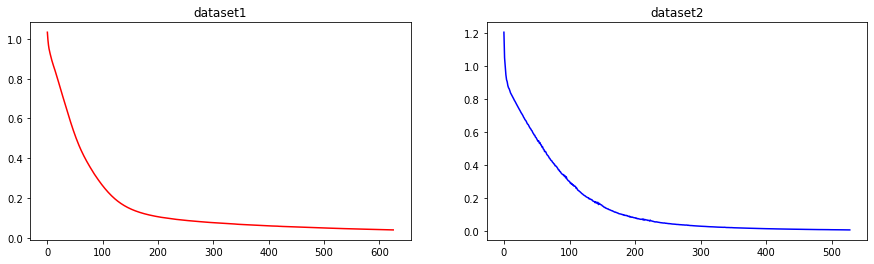

In [17]:
#best models visualization
print('dataset1')
print(f'Training set score: {mlp1.score(X1_train, y1_train)}')
print(f"Test set score: {mlp1.score(X1_test, y1_test)}")

print('dataset2')
print(f"Training set score: {mlp2.score(X2_train, y2_train)}")
print(f"Test set score: {mlp2.score(X2_test, y2_test)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.set_title('dataset1')
ax2.set_title('dataset2')
ax1.plot(mlp1.loss_curve_, c='red')
ax2.plot(mlp2.loss_curve_, c='blue')
plt.show()

# 3. Виконати прогноз на основі моделей нейронних мереж

In [18]:
train_prediction1 = mlp1.predict(X1_train)
test_prediction1 = mlp1.predict(X1_test)
score1 = mlp1.score(X1_test, y1_test)

train_prediction2 = mlp2.predict(X2_train)
test_prediction2 = mlp2.predict(X2_test)
score2 = mlp2.score(X2_test, y2_test)

# 4. Зробити висновки про якість роботи моделей нейронних мереж на досліджених даних.

### a) матриця неточностей (confusion matrix)

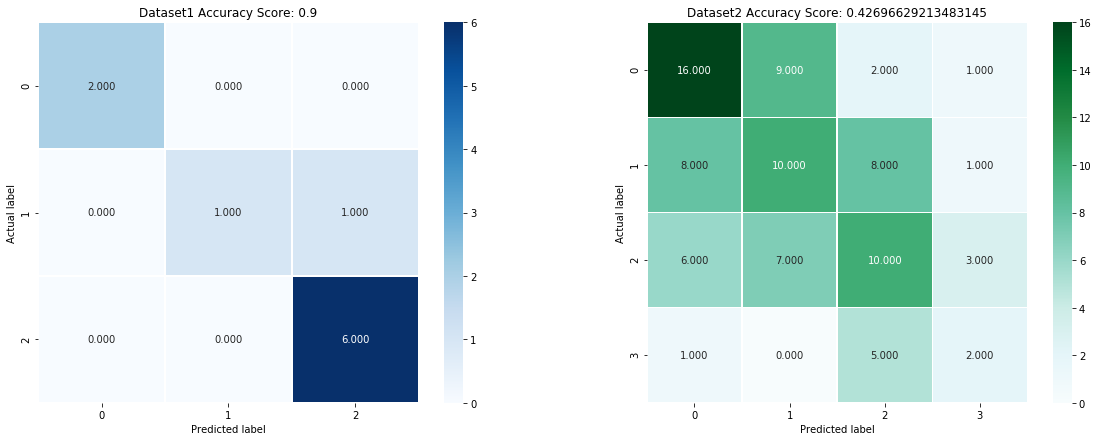

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

cm1 = confusion_matrix(y1_test, test_prediction1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues', ax=ax1)

cm2 = confusion_matrix(y2_test, test_prediction2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'BuGn', ax=ax2)

ax1.set_title(f'Dataset1 Accuracy Score: {score1}')
ax2.set_title(f'Dataset2 Accuracy Score: {score2}')

ax1.set_ylabel('Actual label')
ax1.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
ax2.set_xlabel('Predicted label')

plt.show()

### b) точність (precision), міра F1 (F1 score), повнота (recall)

In [20]:
ps1 = precision_score(y1_test, test_prediction1, average='micro')
ps2 = precision_score(y2_test, test_prediction2, average='micro')

rs1 = recall_score(y1_test, test_prediction1, average='micro')
rs2 = recall_score(y2_test, test_prediction2, average='micro')

fs1 = f1_score(y1_test, test_prediction1, average='micro')
fs2 = f1_score(y2_test, test_prediction2, average='micro')

print('\t\t', 'precision', sep="\t")
print('Dataset1:', ps1, sep="\t\t")
print('Dataset2:', ps2, sep="\t\t")


print('\n\t\t', 'recall_score', sep="\t")
print('Dataset1:', rs1, sep="\t\t")
print('Dataset2:', rs2, sep="\t\t")

print('\n\t\t', 'f1_score', sep="\t")
print('Dataset1:', fs1, sep="\t\t")
print('Dataset2:', fs2, sep="\t\t")

			precision
Dataset1:		0.9
Dataset2:		0.42696629213483145

			recall_score
Dataset1:		0.9
Dataset2:		0.42696629213483145

			f1_score
Dataset1:		0.9
Dataset2:		0.42696629213483145


### с) ROC-криву, показник AUC

In [21]:
def ROCcurvePlot(model, X_test, y_test_true, n_classes):
    y_test = label_binarize(y_test_true, classes=[*range(n_classes)])
    y_score = model.predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc='best')
    plt.title('ROC curve')
    plt.show()
    
    for i in range(n_classes):
        print(f'Class {i}, AUC score: {roc_auc_score(y_test[:, i], y_score[:, i])}\n')

Dataset1 ROC curve


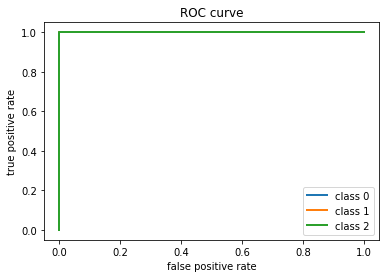

Class 0, AUC score: 1.0

Class 1, AUC score: 1.0

Class 2, AUC score: 1.0

Dataset2 ROC curve


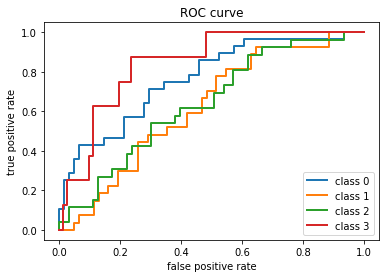

Class 0, AUC score: 0.7646370023419204

Class 1, AUC score: 0.621863799283154

Class 2, AUC score: 0.6385836385836385

Class 3, AUC score: 0.8410493827160495



In [22]:
print("Dataset1 ROC curve") 
ROCcurvePlot(mlp1, X1_test, y1_test, 3)
print("Dataset2 ROC curve") 
ROCcurvePlot(mlp2, X2_test, y2_test, 4)

# 5. Побудувати ансамблi моделей, використовуючи наступнi методи згiдно з варiантом.


## StackingClassifier. Розглянути різні значенння параметру final_estimator, stack_method

З лабораторної работи №2 візьмемо по декілька моделей логістичної регресії LogisticRegression для кожного з датасетів з наступними парпаметрами:

Dataset1:

(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
                   
Dataset2
(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
                   
Ці моделі і будуть значеннями параметру estimators, тобто моделі, що будуть поєднуватися за допомогою метакласифікатору. Для дослідження самого мета-класифікатору final_estimator (The classifier which predicts given the output of estimators), я буду використовувати як найкращі моделі лог. регресії так і моделі нейронних мереж з п.2 
Якість моделі при різних значеннях параметру final_estimator та stack_methods я буду оцінювати за допомогою f1_score. Нижче буде розглянуто ансамблі моделей логістичних регресій з різними параметрами для двох параметрів ансамблю final_estimator: найкраща логістична регресія з другої роботи та фінальна модель нейронної мережі з п.2 даної роботи. 

In [23]:
params1 = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 
           'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr', 
           'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0,
           'warm_start': False}

params11 = {'C': 1, 'penalty': 'l2', 'solver': 'saga'}

params2 = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 
           'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr',
           'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 
           'warm_start': False}
params22 = {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
def grid_search(X_train, y_train, X_test, y_test, 
                    final_estimator, stack_methods, estimators):
  
    results = {"stack_method" : [], "f1_score_test" : []}

    for stack_method in stack_methods:
        clf = StackingClassifier(final_estimator=final_estimator, 
                               stack_method=stack_method, 
                                estimators = estimators)
        clf.fit(X_train, y_train)
        test_predictions = clf.predict(X_test)

        fs = f1_score(y_test, test_predictions, average='micro')

        results['stack_method'].append(stack_method)
        results['f1_score_test'].append(fs)
        
    results_df = pd.DataFrame(results)   
    return results_df.sort_values(by='f1_score_test', ascending=False)

In [25]:
#dataset1
stack_methods = ['auto','predict_proba', 'decision_function', 'predict']
lreg1 = LogisticRegression(**params1)
lreg11 = LogisticRegression(**params11)
estimators = [('logr1', lreg1), ('logr11', lreg11)]
final_estimators = [lreg1, mlp1]
names = ['LogisticRegression', 'MLPClassifier']
for final_estimator, name in zip(final_estimators, names):
    print(f'Dataset1, final_estimator = {name}')
    result_lreg = grid_search(X1_train, y1_train, X1_test, y1_test, final_estimator,stack_methods, estimators)
    print(result_lreg)

Dataset1, final_estimator = LogisticRegression
        stack_method  f1_score_test
1      predict_proba            0.8
0               auto            0.7
3            predict            0.6
2  decision_function            0.3
Dataset1, final_estimator = MLPClassifier


/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


        stack_method  f1_score_test
0               auto            0.9
1      predict_proba            0.9
2  decision_function            0.9
3            predict            0.6


In [26]:
#dataset2
stack_methods = ['auto','predict_proba', 'decision_function', 'predict']
lreg2 = LogisticRegression(**params2)
lreg22 = LogisticRegression(**params22)
estimators = [('logr2', lreg2), ('logr22', lreg22)]
final_estimators = [lreg2, mlp2]
names = ['LogisticRegression', 'MLPClassifier']
for final_estimator, name in zip(final_estimators, names):
    print(f'Dataset2, final_estimator = {name}')
    result_lreg = grid_search(X2_train, y2_train, X2_test, y2_test, final_estimator,stack_methods, estimators)
    print(result_lreg)

Dataset2, final_estimator = LogisticRegression
        stack_method  f1_score_test
3            predict       0.505618
2  decision_function       0.415730
0               auto       0.404494
1      predict_proba       0.404494
Dataset2, final_estimator = MLPClassifier
        stack_method  f1_score_test
3            predict       0.550562
0               auto       0.471910
2  decision_function       0.460674
1      predict_proba       0.415730


### Висновок:
Спробувавши різні значення параметру final_estimator та stack_method та аналізуючи при цьому метрику f1-score, я прийшов до висновку, що даний алгоритм на обох датасетах дає кращий результат коли в якості мета-класифікатору використовується нейронна мережа з пункту2. Що стосується параметру method, то на першому датасеті, не залежно від значення final_estimator найкращий результат я отримую при значенні stack_method = predict_proba, в той час як на другому при значенні stack_method = predict

# 6. Побудувати ансамблі AdaBoost на основі найпростіших моделей:

В якості estimators використати одну/декілька найпростіших моделей заданих за варіантом: дерев рішень та нейронних мереж. Порівняти значення мір F1_score та AUC для ансамблів та окремих моделей, які утворюють ансамбль (модель base_estimator). Порівняти декілька ансамблів, які утворені на основі одних estimators і відрізняються значеннями параметрів.

Для того, щоб порахувати оцінку AUC потрібно змінити розмір масиву цільвої змінної. Для цього використаємо бібліотеку OneHotEncoder.

In [27]:
def onehot_encode(y_true, prediction):
    onehot_encoder = OneHotEncoder(sparse=False)
    y_encoded = y_true.reshape(-1, 1)
    onehot_encoded_true = onehot_encoder.fit_transform(y_encoded)
    prediction_encoded = prediction.reshape(-1, 1)
    onehot_encoded_prediction = onehot_encoder.fit_transform(prediction_encoded)

    return onehot_encoded_true, onehot_encoded_prediction

In [28]:
def check_overfitting(train_acc, test_acc):
    if abs(train_acc - test_acc) < 0.15*train_acc: return "There is no overfitting!!!"
    return "There is overfitting!!!"

Напишемо функцію що буди приймати різні значення параметру stack_method та моделі для побудови ансамблю, та повертати можливі оцінки, перевіряти на переначання та інше.

In [29]:
def build_ansambles_at_given_estimates(X_train, X_test, y_train, y_test, estimators, stack_method):
    clf=StackingClassifier(estimators=estimators,stack_method = stack_method).fit(X_train, y_train)
    model = clf
    print("Stacking classifier score:", clf.score(X_test,y_test))
    i = ""
    print("Model" + str(i))
    y_true = y_test
    y_pred = eval("model" + str(i)).predict(X_test)
    y_true_train = y_train
    y_pred_train = eval("model" + str(i)).predict(X_train)
    probs=eval("model"+str(i)).predict_proba(X_test)
    probs = probs[:, 1]
    print("accuracy_test_data - ",format(accuracy_score(y_true, y_pred),'.3f'))
    print("accuracy_train_data - ",format(accuracy_score(y_true_train, y_pred_train),'.3f'))
    print(check_overfitting(accuracy_score(y_true_train, y_pred_train), accuracy_score(y_true, y_pred)))
    print("precision_score - ", format(precision_score(y_true, y_pred, average = "weighted"),'.3f'))
    print("recall_score - ", format(recall_score(y_true, y_pred, average = "weighted"),'.3f'))
    print("f1_score - ", format(f1_score(y_true, y_pred, average = "weighted"),'.3f'))

In [30]:
#dataset1
estimators=[
    ("dt", lreg1),
    ("nn", MLPClassifier(activation = 'relu', hidden_layer_sizes = 750, max_iter = 1000, solver = 'adam', warm_start = False),
    ("ml", mlp1))
    ]
stack_methods = ['auto','predict_proba', 'predict']
for stack_method in stack_methods:
    print(f'Dataset1, stack_method = {stack_method}')
    build_ansambles_at_given_estimates(X1_train, X1_test, y1_train, y1_test, estimators, stack_method)

Dataset1, stack_method = auto


/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Stacking classifier score: 0.9
Model
accuracy_test_data -  0.900
accuracy_train_data -  0.975
There is no overfitting!!!
precision_score -  0.914
recall_score -  0.900
f1_score -  0.887
Dataset1, stack_method = predict_proba
Stacking classifier score: 0.9
Model
accuracy_test_data -  0.900
accuracy_train_data -  0.975
There is no overfitting!!!
precision_score -  0.914
recall_score -  0.900
f1_score -  0.887
Dataset1, stack_method = predict
Stacking classifier score: 0.9
Model
accuracy_test_data -  0.900
accuracy_train_data -  0.975
There is no overfitting!!!
precision_score -  0.914
recall_score -  0.900
f1_score -  0.887


In [31]:
#dataset2
estimators=[
    ("dt", lreg2),
    ("nn", MLPClassifier(activation = 'relu', hidden_layer_sizes = 750, max_iter = 1000, solver = 'adam', warm_start = False),
    ("ml", mlp2))
    ]
stack_methods = ['auto','predict_proba', 'predict']
for stack_method in stack_methods:
    print(f'Dataset2, stack_method = {stack_method}')
    build_ansambles_at_given_estimates(X2_train, X2_test, y2_train, y2_test, estimators, stack_method)

Dataset2, stack_method = auto
Stacking classifier score: 0.48314606741573035
Model
accuracy_test_data -  0.483
accuracy_train_data -  0.660
There is overfitting!!!
precision_score -  0.461
recall_score -  0.483
f1_score -  0.461
Dataset2, stack_method = predict_proba


/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Stacking classifier score: 0.48314606741573035
Model
accuracy_test_data -  0.483
accuracy_train_data -  0.677
There is overfitting!!!
precision_score -  0.459
recall_score -  0.483
f1_score -  0.460
Dataset2, stack_method = predict


/home/itsuprun/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Stacking classifier score: 0.5393258426966292
Model
accuracy_test_data -  0.539
accuracy_train_data -  0.660
There is overfitting!!!
precision_score -  0.533
recall_score -  0.539
f1_score -  0.522


Порівнявши декілька ансамблів, які утворені на основі одних estimators і відрізняються значеннями параметру stack_method можна сказати, що цей параметр не значно впливає на точність даних ансамблів моделей, а також не рятує від перенавчання.

#  7. Загальний висновок.
###### Порівнявши результат найкращих моделей лабораторної роботи номер 2, та результат, якого ми досягли за допомогою ансамблів, можна сказати, що на першому датасеті вдалося дуже значно покращити точність моделі, про що свідчать майже всі метрики якості, а також не спостерігається перенавчання, в той час як на другому датасеті спостерігається перенавчання та покращення не відбувається, або відбувається але не значне. Мораль тут в наступному, ансамбль може допомогти навчити моедль до високої точнсті, але потрібно бути обережним, так як досить легко можна отримати перенавчання.